In [6]:
import pandas as pd
import numpy as np
import os
os.chdir('/Users/wyattscott/Documents/DS5110/Project')

import seaborn as sns
import matplotlib.pyplot as plt
import shap
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import randint

from pandas_profiling import ProfileReport

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from preptrain import preprocess_and_train
from pltcorrheatmap import plot_corr_heatmap

In [14]:
df = pd.read_csv('df_clean.csv')
df_last = pd.read_csv('df_last.csv')

In [15]:
label_col_name = "mvp_share"
labels = df.pop(label_col_name)
stratify = df.pop("Rank")

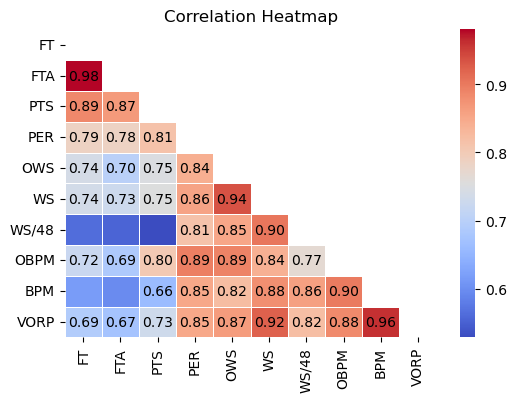

In [19]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [20]:
df = df.drop(columns=['FTA', 'FT'])
df_last = df_last.drop(columns=['FTA', 'FT'])

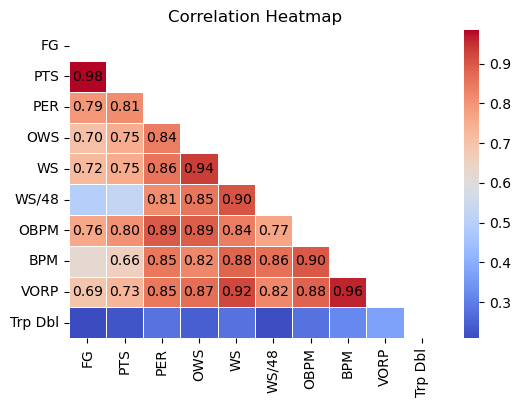

In [21]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [22]:
df = df.drop(columns=['PTS', 'WS'])
df_last = df_last.drop(columns=['PTS', 'WS'])

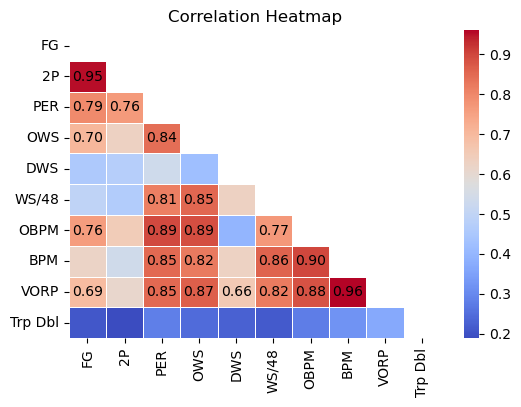

In [23]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [24]:
df = df.drop(columns=['FG', 'BPM'])
df_last = df_last.drop(columns=['FG', 'BPM'])

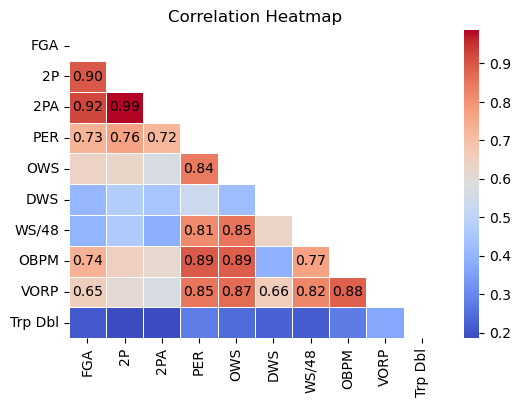

In [25]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [26]:
df = df.drop(columns=['2P', '2PA'])
df_last = df_last.drop(columns=['2P', '2PA'])

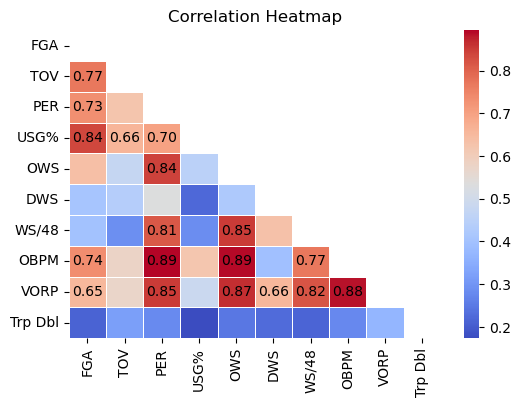

In [27]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [28]:
df = df.drop(columns=['OWS', 'PER'])
df_last = df_last.drop(columns=['OWS', 'PER'])

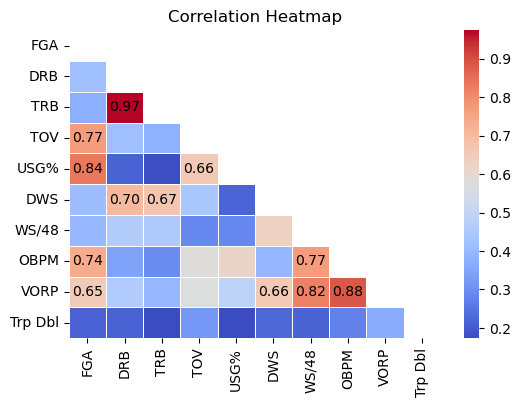

In [29]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [30]:
df = df.drop(columns=['TRB'])
df_last = df_last.drop(columns=['TRB'])

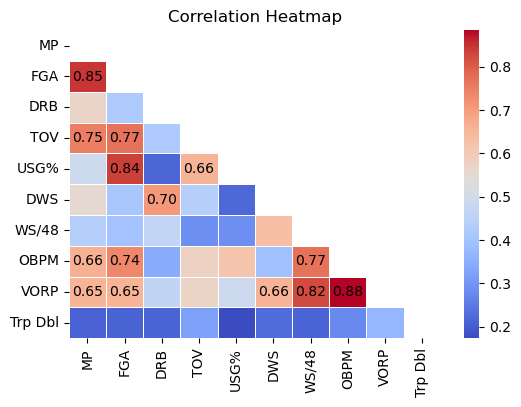

In [31]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [32]:
df = df.drop(columns=['FGA', 'USG%'])
df_last = df_last.drop(columns=['FGA', 'USG%'])

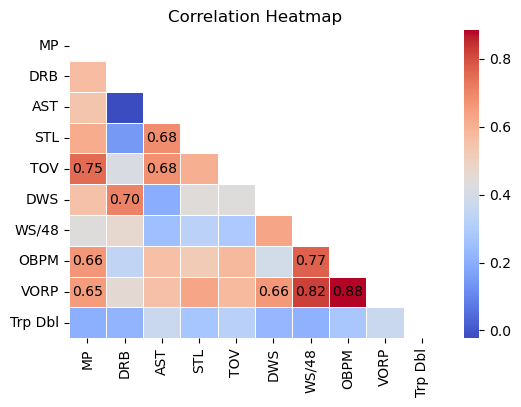

In [33]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [34]:
df = df.drop(columns=['OBPM'])
df_last = df_last.drop(columns=['OBPM'])

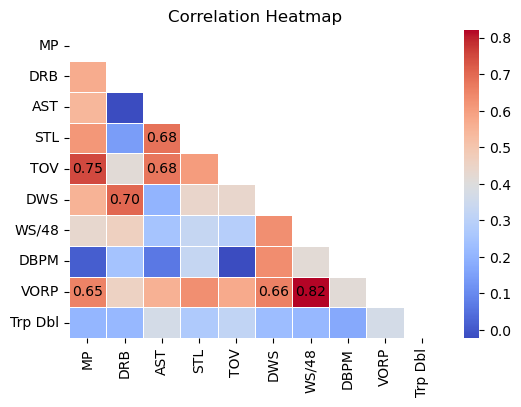

In [35]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

In [36]:
df = df.drop(columns=['WS/48'])
df_last = df_last.drop(columns=['WS/48'])

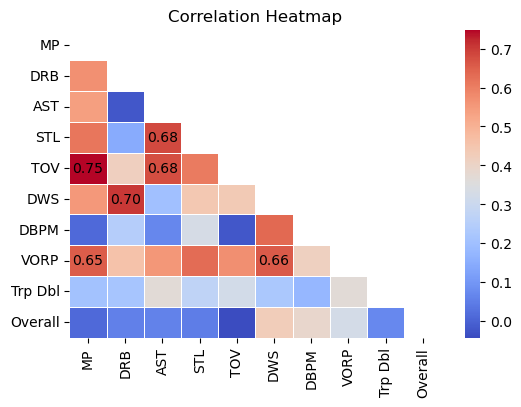

In [37]:
selected_feature_names, X_train, X_test, y_train, y_test = preprocess_and_train(df, df_last, labels)

df_check_selected = df[selected_feature_names]
corr_matrix = df_check_selected.corr()

plot_corr_heatmap(corr_matrix, selected_feature_names, threshold=0.65)

---

# Modeling

## Basic Linear Model

In [46]:
# Initialize a linear regression model
linear_model = LinearRegression()

# Fit the model on the preprocessed training data
linear_model.fit(X_train, y_train)

# Make predictions on the test data using the model fitted on selected features
y_pred_ols = linear_model.predict(X_test)

# Evaluate the model using mean squared error and R-squared on selected features
test_mse_ols = mean_squared_error(y_test, y_pred_ols)
test_r2_ols = r2_score(y_test, y_pred_ols)

print("Test MSE (OLS):", test_mse_ols)
print("Test R-squared (OLS):", test_r2_ols)

Test MSE (OLS): 0.004409602679819502
Test R-squared (OLS): 0.3633281547099414


## Random Forest

In [44]:
# Define the hyperparameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=28)

# Initialize RandomizedSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                                      n_iter=50, scoring='r2', cv=10, random_state=28)

# Perform random search
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = random_search_rf.best_params_
print("Best Hyperparameters (Random Forest):", best_params_rf)

# Get the best model
best_rf_model = random_search_rf.best_estimator_

# Make predictions on the test data using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model using mean squared error and R-squared
test_mse_rf = mean_squared_error(y_test, y_pred_rf)
test_r2_rf = r2_score(y_test, y_pred_rf)

print("Test MSE (Best Random Forest):", test_mse_rf)
print("Test R-squared (Best Random Forest):", test_r2_rf)

Best Hyperparameters (Random Forest): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Test MSE (Best Random Forest): 0.0018113460149389268
Test R-squared (Best Random Forest): 0.738472353741139


## Gradient Boosting Regressor

In [41]:
# Define the hyperparameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.15],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples used for fitting the individual base learners
    'max_features': ['auto', 'sqrt']  # Number of features to consider when looking for the best split
}

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=28)

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=gb_model, param_distributions=param_grid_gb,
                                      n_iter=50, scoring='r2', cv=10, random_state=28)

# Perform random search
random_search_gb.fit(X_train, y_train)

# Get the best hyperparameters
best_params_gb = random_search_gb.best_params_
print("Best Hyperparameters (Gradient Boosting):", best_params_gb)

# Get the best model
best_gb_model = random_search_gb.best_estimator_

# Make predictions on the test data using the best model
y_pred_gb = best_gb_model.predict(X_test)

# Evaluate the best model using mean squared error and R-squared
test_mse_gb = mean_squared_error(y_test, y_pred_gb)
test_r2_gb = r2_score(y_test, y_pred_gb)

print("Test MSE:", test_mse_gb)
print("Test R-squared:", test_r2_gb)

Best Hyperparameters (Gradient Boosting): {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05}
Test MSE: 0.001654784136945875
Test R-squared: 0.7610772338179974


## XGBoost Regressor

In [42]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'learning_rate': [0.05, 0.1, 0.15],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child
    'subsample': [0.6, 0.8, 1.0],  # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term on weights
}

# Initialize XGBRegressor
xgb_model = XGBRegressor(random_state=28)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid,
                                   n_iter=50, scoring='r2', cv=5, random_state=28)

# Perform random search
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_xgb_model = random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model using mean squared error and R-squared
test_mse_xgb = mean_squared_error(y_test, y_pred_xgb)
test_r2_xgb = r2_score(y_test, y_pred_xgb)

print("Test MSE (Best XGBoost):", test_mse_xgb)
print("Test R-squared (Best XGBoost):", test_r2_xgb)

Best Hyperparameters: {'subsample': 0.6, 'reg_lambda': 0, 'reg_alpha': 0.5, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.8}
Test MSE (Best XGBoost): 0.0016085803919932502
Test R-squared (Best XGBoost): 0.7677482710279764


## NeuralNet

In [43]:
# Define the hyperparameter grid
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Number of neurons in each hidden layer
    'activation': ['relu'],  # Activation function for the hidden layers
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'learning_rate_init': [0.001, 0.01, 0.1],  # Initial learning rate
    'max_iter': [300, 400, 500],  # Maximum number of iterations
}

# Initialize MLPRegressor
mlp_model = MLPRegressor(random_state=28)

# Initialize RandomizedSearchCV
random_search_mlp = RandomizedSearchCV(estimator=mlp_model, param_distributions=param_grid_mlp,
                                       n_iter=50, scoring='r2', cv=10, random_state=28)

# Perform random search
random_search_mlp.fit(X_train, y_train)

# Get the best hyperparameters
best_params_mlp = random_search_mlp.best_params_
print("Best Hyperparameters (MLP):", best_params_mlp)

# Get the best model
best_mlp_model = random_search_mlp.best_estimator_

# Make predictions on the test data using the best model
y_pred_mlp = best_mlp_model.predict(X_test)

# Evaluate the best model using mean squared error and R-squared
test_mse_mlp = mean_squared_error(y_test, y_pred_mlp)
test_r2_mlp = r2_score(y_test, y_pred_mlp)

print("Test MSE (Best MLP):", test_mse_mlp)
print("Test R-squared (Best MLP):", test_r2_mlp)

Best Hyperparameters (MLP): {'max_iter': 300, 'learning_rate_init': 0.01, 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'}
Test MSE (Best MLP): 0.0018439193109504272
Test R-squared (Best MLP): 0.7337693222018733


## Compare Model Accuracy

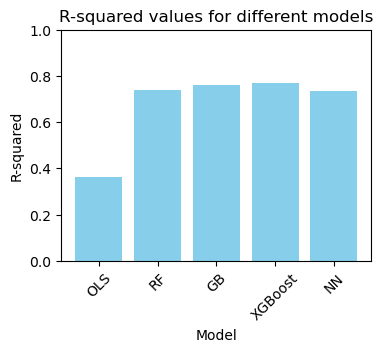

In [47]:
r_sqs = [test_r2_ols, test_r2_rf, test_r2_gb, test_r2_xgb, test_r2_mlp]

# List of model names
model_names = ['OLS', 'RF', 'GB', 'XGBoost', 'NN']

# Plot the bar chart
plt.figure(figsize=(4, 3))
plt.bar(model_names, r_sqs, color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.title('R-squared values for different models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.show()